In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import shapely

In [7]:
storage_options = { 
    'client_kwargs': { 
        'endpoint_url': 'https://minio.minio-tenant/',
        'verify': False
    },
    'key': 'admin',
    'secret': '6bd71ace-8866-407a-9bcc-714bc5753f18',
}

s3_url = "s3://dutrajardim-etls/fire_information/fire_detections.parquet/shapeID=BRA-ADM2-56859067B15604131"
df_bh = pd.read_parquet(s3_url, storage_options=storage_options)

In [13]:
s3_url = "s3://dutrajardim-etls/fire_information/city_shapes.json/shapeID=BRA-ADM2-56859067B15604131/*"
df_shapes = pd.read_json(s3_url, storage_options=storage_options, lines=True)

In [25]:
df_shapes

,geometry,shape_name,level
0,POLYGON ((-43.94610595699993 -19.7783813479999...,Belo Horizonte,ADM2


In [26]:
shapes = gpd.GeoDataFrame(df_shapes, geometry=gpd.GeoSeries.from_wkt(df_shapes['geometry']))

[]

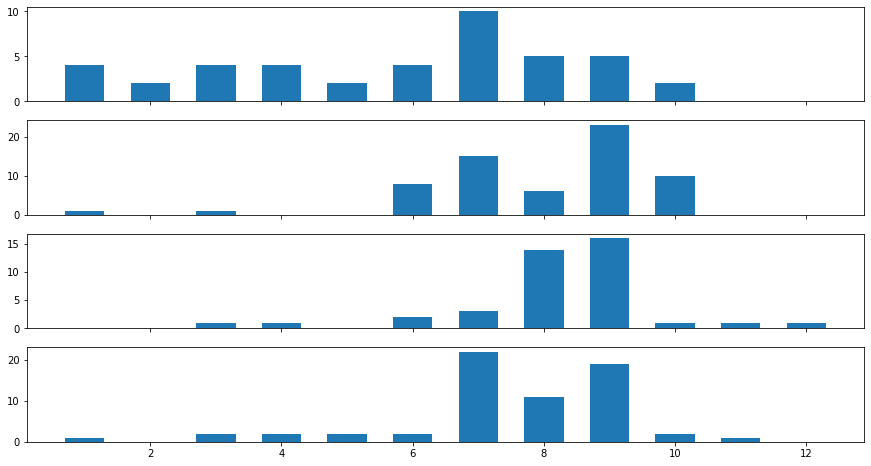

In [88]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15,8), sharex=True)

df_bh_ts = df_bh.set_index('datetime')

for key, [key_year, df_year] in enumerate(df_bh_ts.groupby(pd.Grouper(freq='Y'))):
    df_tmp = df_year.groupby(pd.Grouper(freq='M')).type.agg('count')
    axs[key].bar(df_tmp.index.month, df_tmp.values, width=.6)

plt.plot()

In [30]:
df_bh_september = df_bh[(df_bh['datetime'] >= '2021-08') & (df_bh['datetime'] < '2021-9') ]

gdf_bh_september = gpd.GeoDataFrame(
    df_bh_september,
    geometry=gpd.points_from_xy(df_bh_september['longitude'], df_bh_september['latitude'])
)

In [39]:
gdf_bh = gpd.GeoDataFrame(
    df_bh,
    geometry=gpd.points_from_xy(df_bh['longitude'], df_bh['latitude'])
)

[]

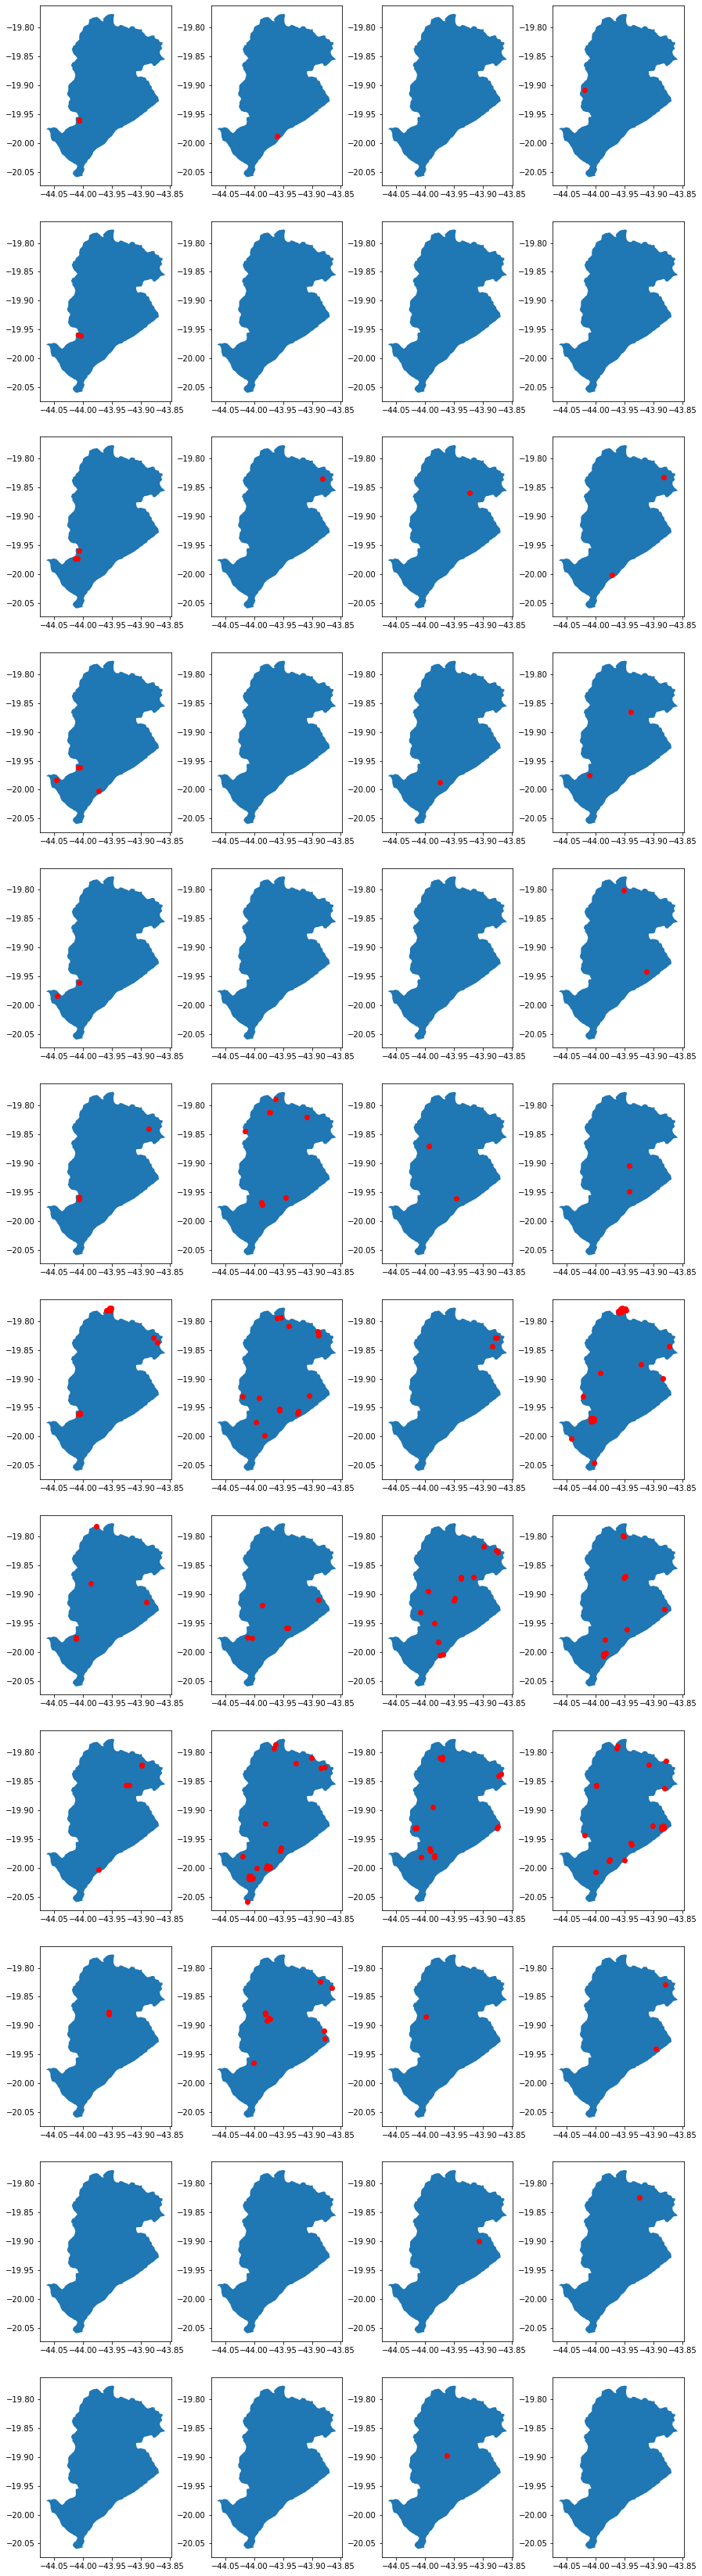

In [49]:
gdf_bh_ts = gdf_bh.set_index('datetime')

groups = gdf_bh_ts.groupby(pd.Grouper(freq='Y'))
ncols = len(groups)

fig, axs = plt.subplots(nrows=12, ncols=ncols, figsize=(15, 60))

for key, [key_year, df_year] in enumerate(groups):
    for m in range(12):
        shapes.plot(ax=axs[m, key])
        df_year[df_year.index.month == (m + 1)].plot(ax=axs[m, key], color='red')

plt.plot()

[]

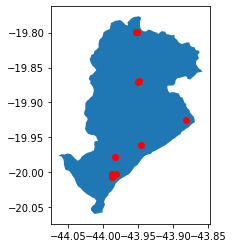

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1)

shapes.plot(ax=ax)
gdf_bh_september.plot(ax=ax, color='red')

plt.plot()

In [31]:
df_bh_september

,latitude,longitude,datetime,type,geometry
135,-19.925348,-43.881481,2021-08-10 07:12:00,0,POINT (-43.88148 -19.92535)
136,-19.978374,-43.983974,2021-08-16 07:00:00,0,POINT (-43.98397 -19.97837)
137,-19.798735,-43.953102,2021-08-20 20:00:00,0,POINT (-43.95310 -19.79874)
138,-19.799726,-43.951874,2021-08-20 20:00:00,0,POINT (-43.95187 -19.79973)
139,-19.869274,-43.949104,2021-08-25 20:06:00,0,POINT (-43.94910 -19.86927)
140,-19.871351,-43.95113,2021-08-25 20:06:00,0,POINT (-43.95113 -19.87135)
141,-19.961147,-43.94614,2021-08-27 19:24:00,0,POINT (-43.94614 -19.96115)
142,-20.002594,-43.987576,2021-08-31 19:48:00,0,POINT (-43.98758 -20.00259)
143,-20.001659,-43.982349,2021-08-31 19:48:00,0,POINT (-43.98235 -20.00166)
144,-20.006601,-43.987038,2021-08-31 19:48:00,0,POINT (-43.98704 -20.00660)


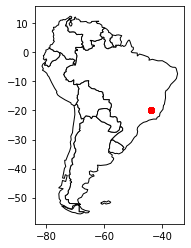

In [32]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# # We can now plot our ``GeoDataFrame``.
gdf_bh_september.plot(ax=ax, color='red')

plt.show()

In [33]:
map = folium.Map(tiles = "Stamen Terrain", zoom_start = 9)

for longitude, latitude, datetime in df_bh_september[['longitude', 'latitude', 'datetime']].values:
    map.add_child(folium.CircleMarker(location=(latitude, longitude), color='red', popup=datetime))

map

In [ ]:
df_bh[df_bh['datetime'] > '2021-10-01']

In [ ]:
df_bh['type'].value_counts()